*Dataset Overview:*

The dataset contains 20,000 observations and 54 features describing workout sessions, user demographics, heart-rate data, and nutritional information. Each row represents a unique workout session, including associated food intake and physiological metrics. The data provides a basis for exploring how nutrition and exercise behaviors interact to influence performance and body composition.

*Initial Research Questions*
1. how different nutrition habits and workout characteristics influence fitness performance indicators such as calorie burn, heart rate, and body composition?

2. Do demographic factors (age, gender, BMI) influence workout difficulty or performance?

3. Are there patterns connecting food quality (macros, sugar, sodium) with indicators of metabolic health such as body-fat percentage?

*Supporting Detail Questions*
1. How does workout duration relate to calories burned?
2. Does BPM increase with workout difficulty level?
3. Do higher-protein meals correlate with more intense workouts?
4. How does water intake vary by workout type?
5. Are BMI or body-fat values showing outliers that reflect measurement issues?

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("Final_data.csv")

print(df.shape)
#There are 20000 rows and 54 columns in this dataset.

#From examining the raw values, several variables appear to be correlated with each other. For example, session duration
# and calories burned is correlated. A longer session duration results in higher calories burned. Seesion duration is also
# correlated with variables such as Max_BPM.

(20000, 54)


In [ ]:
# Checks for missing values and sum of missing values in each column

print(df.isnull().sum())
#There are no missing values in this dataset.



Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [ ]:
# Check for duplicates

df.duplicated().sum()


np.int64(0)

In [ ]:
#Identifies and displays names of quantitiative variables

quantitative_vars = df.select_dtypes(include='number').columns
print(quantitative_vars)
print("Number of quantitative variables:", len(quantitative_vars))
print(quantitative_vars)

Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level', 'BMI', 'Daily meals frequency', 'Physical exercise',
       'Carbs', 'Proteins', 'Fats', 'Calories', 'sugar_g', 'sodium_mg',
       'cholesterol_mg', 'serving_size_g', 'prep_time_min', 'cook_time_min',
       'rating', 'Sets', 'Reps', 'Burns Calories (per 30 min)', 'BMI_calc',
       'cal_from_macros', 'pct_carbs', 'protein_per_kg', 'pct_HRR',
       'pct_maxHR', 'cal_balance', 'lean_mass_kg', 'expected_burn',
       'Burns Calories (per 30 min)_bc'],
      dtype='object')
Number of quantitative variables: 39
Index(['Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
       'Session_Duration (hours)', 'Calories_Burned', 'Fat_Percentage',
       'Water_Intake (liters)', 'Workout_Frequency (days/week)',
       'Experience_Level

In [ ]:
# Identifies and displays names of categorical variables

categorical_vars = df.select_dtypes(exclude='number').columns
print(categorical_vars)
print("Number of categorical variables:", len(categorical_vars))
print(categorical_vars)



Index(['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type',
       'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'Burns_Calories_Bin'],
      dtype='object')
Number of categorical variables: 15
Index(['Gender', 'Workout_Type', 'meal_name', 'meal_type', 'diet_type',
       'cooking_method', 'Name of Exercise', 'Benefit', 'Target Muscle Group',
       'Equipment Needed', 'Difficulty Level', 'Body Part', 'Type of Muscle',
       'Workout', 'Burns_Calories_Bin'],
      dtype='object')


In [ ]:
# Displays min and max values for each column

print(df.min())
print(df.max())
#The min and max values for each variable are reasonable. There are not any obvious outliers in this dataset.

Age                                                           18.0
Gender                                                      Female
Weight (kg)                                                  39.18
Height (m)                                                    1.49
Max_BPM                                                     159.31
Avg_BPM                                                     119.07
Resting_BPM                                                  49.49
Session_Duration (hours)                                      0.49
Calories_Burned                                             323.11
Workout_Type                                                Cardio
Fat_Percentage                                           11.333134
Water_Intake (liters)                                         1.46
Workout_Frequency (days/week)                                 1.94
Experience_Level                                               1.0
BMI                                                          1

In [ ]:
#Descriptive statistics

df.describe()


,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),...,BMI_calc,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04
mean,38.851453,73.898832,1.723093,179.889702,143.704306,62.195813,1.259446,1280.109600,26.101313,2.627485,...,24.921651,1998.297076,0.499983,1.460142,0.699005,0.802305,744.308699,53.786384,866.352318,8.631802e+19
std,12.114580,21.173010,0.127033,11.510805,14.267688,7.289351,0.341336,502.228982,4.996160,0.604724,...,6.701144,440.848408,0.001455,0.518946,0.144880,0.096613,720.946619,12.498740,250.317069,3.197579e+19
min,18.000000,39.180000,1.490000,159.310000,119.070000,49.490000,0.490000,323.110000,11.333134,1.460000,...,12.037907,1105.570000,0.492434,0.516706,0.371344,0.599789,-1266.220000,30.946261,219.852800,2.491905e+16
25%,28.170000,58.160000,1.620000,170.057500,131.220000,55.960000,1.050000,910.800000,22.387807,2.170000,...,20.094975,1661.022500,0.499054,1.076294,0.583656,0.727676,261.432500,44.587037,714.098250,6.441978e+19
50%,39.865000,70.000000,1.710000,180.140000,142.990000,62.200000,1.270000,1231.450000,25.822504,2.610000,...,24.119097,1943.130000,0.499981,1.382260,0.686284,0.794834,691.190000,51.204908,868.721400,8.371578e+19
75%,49.630000,86.100000,1.800000,189.425000,156.060000,68.090000,1.460000,1553.112500,29.676026,3.120000,...,28.562620,2271.950000,0.500910,1.750495,0.798196,0.869211,1176.290000,61.939016,1012.532700,1.100442e+20
max,59.670000,130.770000,2.010000,199.640000,169.840000,74.500000,2.020000,2890.820000,35.000000,3.730000,...,50.229544,3699.540000,0.507889,3.916881,1.073939,1.047032,3075.580000,90.117371,1477.108800,1.756614e+20


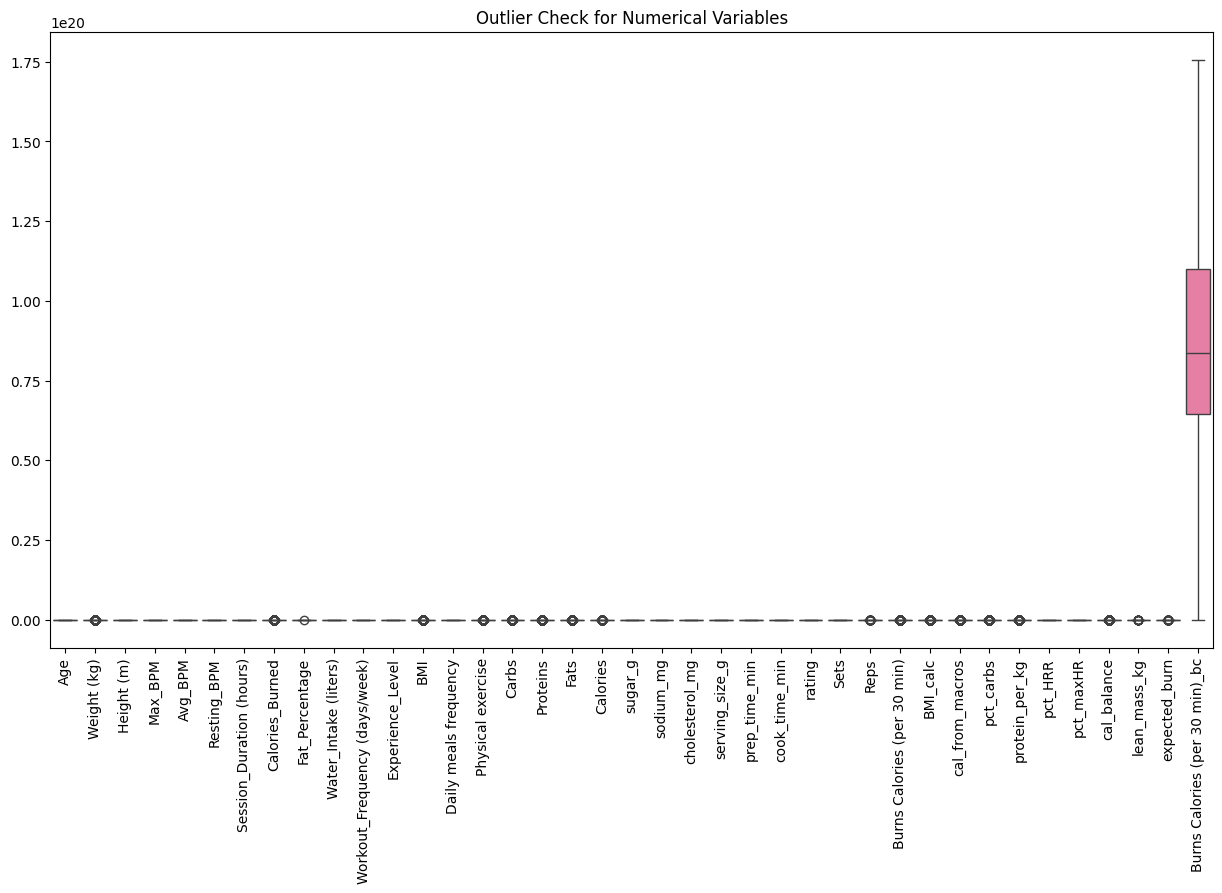

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15,8))
sns.boxplot(data=df[numeric_cols])
plt.xticks(rotation=90)
plt.title("Outlier Check for Numerical Variables")
plt.show()


2a. How is each variable distributed?
- **Age, Height, Weight**: show smooth distributions without extreme spikes, consistent with a population of adults engaging in regular exercise.
- **Heart-rate measures (Avg_BPM, Max_BPM, Resting_BPM)**: fall into typical physiological ranges for active individuals.
- **Session_Duration and Calories_burned**: are right-skewed. Most people complete moderate-length sessions, with a smaller number doing longer or more intense workouts, which is expected.
- **Macro nutrients (carbs, fat, protein) and calculated features (cal_from_macros, pct_carbs, protein_per_kg)**: vary widely but stay within plausible nutrition ranges.
- **Body composition variables (BMI, lean_mass_kg, body-fat-related fields)**: center around reasonable human values with natural variability.

2b. Do the maximum and minimum values seem reasonable?
- No negative ages, calories, or BPM values,
- No impossible heights or weights
- No nutrient values that are excessively unrealistic
- No workout durations of 0 hours or extreme high values
- No out-of-range heart rates (e.g., nothing like Max_BPM = 300)
All min/max values appear reasonable and consistent with real-world exercise and nutrition data.

2c. If there are outliers, do you think they
are mistakes or correct data?
- Most variables show outliers that look like normal human variation, so they appear to be correct data.
- The only exception is “Burns Calories (per 30 min)_bc,” which has impossible values, so those outliers are mistakes, not real data.

2.d If you have missing values, does it
make sense to ignore the whole row, or should you impute the values
somehow? If the latter, then how will you do that?
- We do not have any missing values and will not need to do either of these.

In [ ]:
import numpy as np

df["log_Calories_Burned"] = np.log(df["Calories_Burned"] + 1)
df["log_Session_Duration"] = np.log(df["Session_Duration (hours)"] + 1)


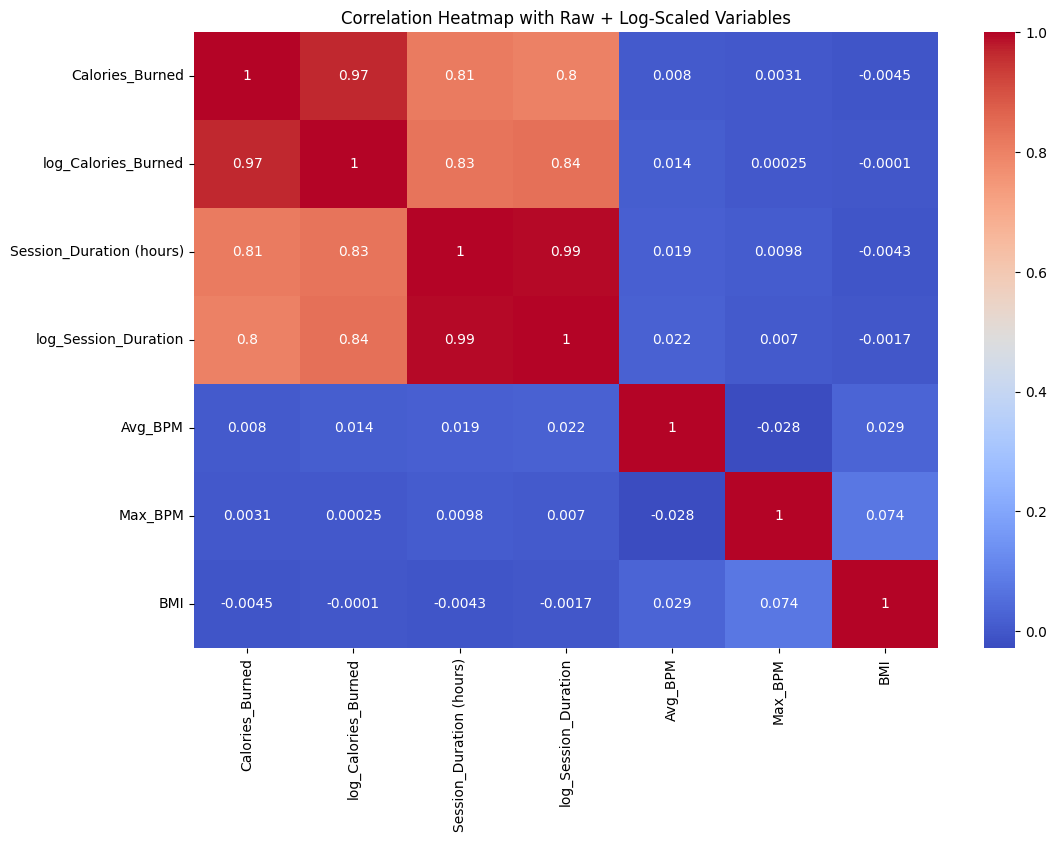

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_vars = [
    "Calories_Burned", "log_Calories_Burned",
    "Session_Duration (hours)", "log_Session_Duration",
    "Avg_BPM", "Max_BPM", "BMI"
]

plt.figure(figsize=(12,8))
sns.heatmap(df[corr_vars].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap with Raw + Log-Scaled Variables")
plt.show()


3. How are different variables correlated with each other? Can you find
meaningful correlations by changing scales (i.e., using a log scale for
one variable)?
- Session duration and calories burned are strongly correlated (≈0.80), and the log scale shows a similar strong relationship.
- Heart-rate variables and BMI show little to no correlation with calories burned or duration.
- Using a log scale helps smooth out skewed variables, but it doesn’t change the overall correlation patterns already present.



***EDA findings summary:***

Our dataset contains 20,000 observations and 54 features, with no missing values or duplicates. Numerical variables include demographics, workout metrics, and nutritional breakdowns, while categorical variables describe workout types, meal types, and diet characteristics. Most variables fall within reasonable value ranges, and outliers appear realistic except for one feature (“Burns Calories (per 30 min)_bc”), which contains clearly incorrect values and will be removed.

The strongest and most consistent pattern in the data is the relationship between session duration and calories burned, which shows a high positive correlation even after applying a log scale. Longer workouts reliably lead to higher calorie expenditure. In contrast, heart-rate metrics (Avg_BPM and Max_BPM) and BMI show almost no correlation with calories burned or workout duration, which was surprising given typical expected excercise trends. Nutrition variables vary widely but do not show strong immediate correlations with performance indicators.

Overall, the dataset is clean and well-behaved, and the clearest insights come from exploring workout behavior rather than heart-rate or metabolic responses.



**Refined questions:**

How do nutrition habits and workout characteristics influence calorie burn, heart rate, and body composition?
* Refinement:
    - Focus the analysis on workout duration and workout type, because these showed meaningful relationships with calories burned.
    - Heart-rate variables may not be central indicators in this dataset since they showed almost no correlation with performance metrics.

Do demographics influence workout difficulty or performance?
* Refinement:
    - BMI and age show minimal relationships with calories burned or workout duration, so demographic effects may be weaker than expected.
    - Gender and experience level may be more relevant to compare than BMI.

Are nutrition patterns (macros, sugar, sodium) related to body-fat percentage?
* Refinement:
    - Since nutrition variables did not strongly correlate with performance metrics, this question may require grouped analysis (e.g., comparing high-protein vs low-protein groups) instead of simple correlations.
    - Body-fat percentage should be paired with categorical nutrition variables (diet type, meal type) rather than numerical macros alone.

Revised Big-Picture Questions
- What workout factors most strongly predict calories burned?
- How do different workout types compare in intensity and energy expenditure
- Are diet types or meal categories meaningfully associated with differences in body composition or caloric output?


**New questions EDA raised:**


Our EDA also raised a few new questions worth exploring in the next phase. The lack of correlation between heart-rate measures and workout intensity or calories burned was unexpected, suggesting that BPM values may be inconsistent or not measured uniformly. Similarly, the weak relationship between BMI and performance metrics may indicate that the sample has relatively similar body composition. Finally, it is unclear whether categorical nutrition variables (such as diet type or meal type) might be more informative predictors of health outcomes than numerical macronutrient values. These questions can help guide our next set of visualizations and analyses.





*Reflection on the Process*

Conducting this EDA helped us understand not just the structure of the dataset, but also its limitations. Initially, we expected stronger correlations between heart-rate metrics and calorie burn, but the weak results prompted us to rethink which variables best represent workout intensity. The process also clarified which data cleaning steps (such as handling outliers and scaling) will be essential before modeling. Overall, the EDA shifted our focus from general heart-rate metrics toward more reliable indicators like session duration and workout type.